**Random forest algorithm implementation**

In [124]:
#importing the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings#ignore warnings
warnings.filterwarnings('ignore')

In [125]:
#Reading the csv file and putting it into 'df' object
df = pd.read_csv("heart_statlog.csv")
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


**Preprocessing the data**

In [126]:
#checking the data types of all the col present in the given set
df.dtypes

age                                       int64
sex                                       int64
chest                                     int64
resting_blood_pressure                    int64
serum_cholestoral                         int64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved               int64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
class                                    object
dtype: object

In [127]:
#Since the class column is of categorical type convert that numerical by using replace
df["class"].unique()
df["class"].replace({"present":1,"absent":0},inplace = True)
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [128]:
#checking for missing values
df.isnull().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [129]:
#putting featurevariable to X and Target Variable to Y
X = df.drop('class',axis=1)
# Putting response variable to y
y = df['class']

**Splitting the data into test and train data using train-test-split**

In [130]:
#import tarin-test-split from skicit-learn
from sklearn.model_selection import train_test_split

In [131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 13), (81, 13))

**Import RandomForestClassifier and fit the data.**

In [132]:
from sklearn.ensemble import RandomForestClassifier
heart_disease_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

Here Random state is used to get same results even if we execute it in any other system,n+jobs represents the no of processors allowed to use,n-estimators is number of trees to be build before averagig the results, oob score is the cross validation method of the random forest

In [133]:
heart_disease_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [134]:
#Checking the oob score
heart_disease_classifier.oob_score_

0.8412698412698413

In [135]:
from sklearn.metrics import accuracy_score
y_pred = heart_disease_classifier.predict(X_test)
# Check accuracy score 
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.8272


**Confusion matrix**

In [136]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[46  3]
 [11 21]]


**CLASSIFICATION REPORT**


Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the mode

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        49
           1       0.88      0.66      0.75        32

    accuracy                           0.83        81
   macro avg       0.84      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81



**Lets do hyper tuning the data for Random forest using GridsearchCV and fit the data**

In [138]:
heart_disease_claasifier1 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [139]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=heart_disease_claasifier1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [142]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [143]:
grid_search.best_score_

0.84197695035461

In [144]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=42)

From hyperparameter tuning, we can fetch the best estimator as shown. The best set of parameters identified were max_depth=2, min_samples_leaf=10,n_estimators=25

**visualize the feature scores with matplotlib and seaborn**

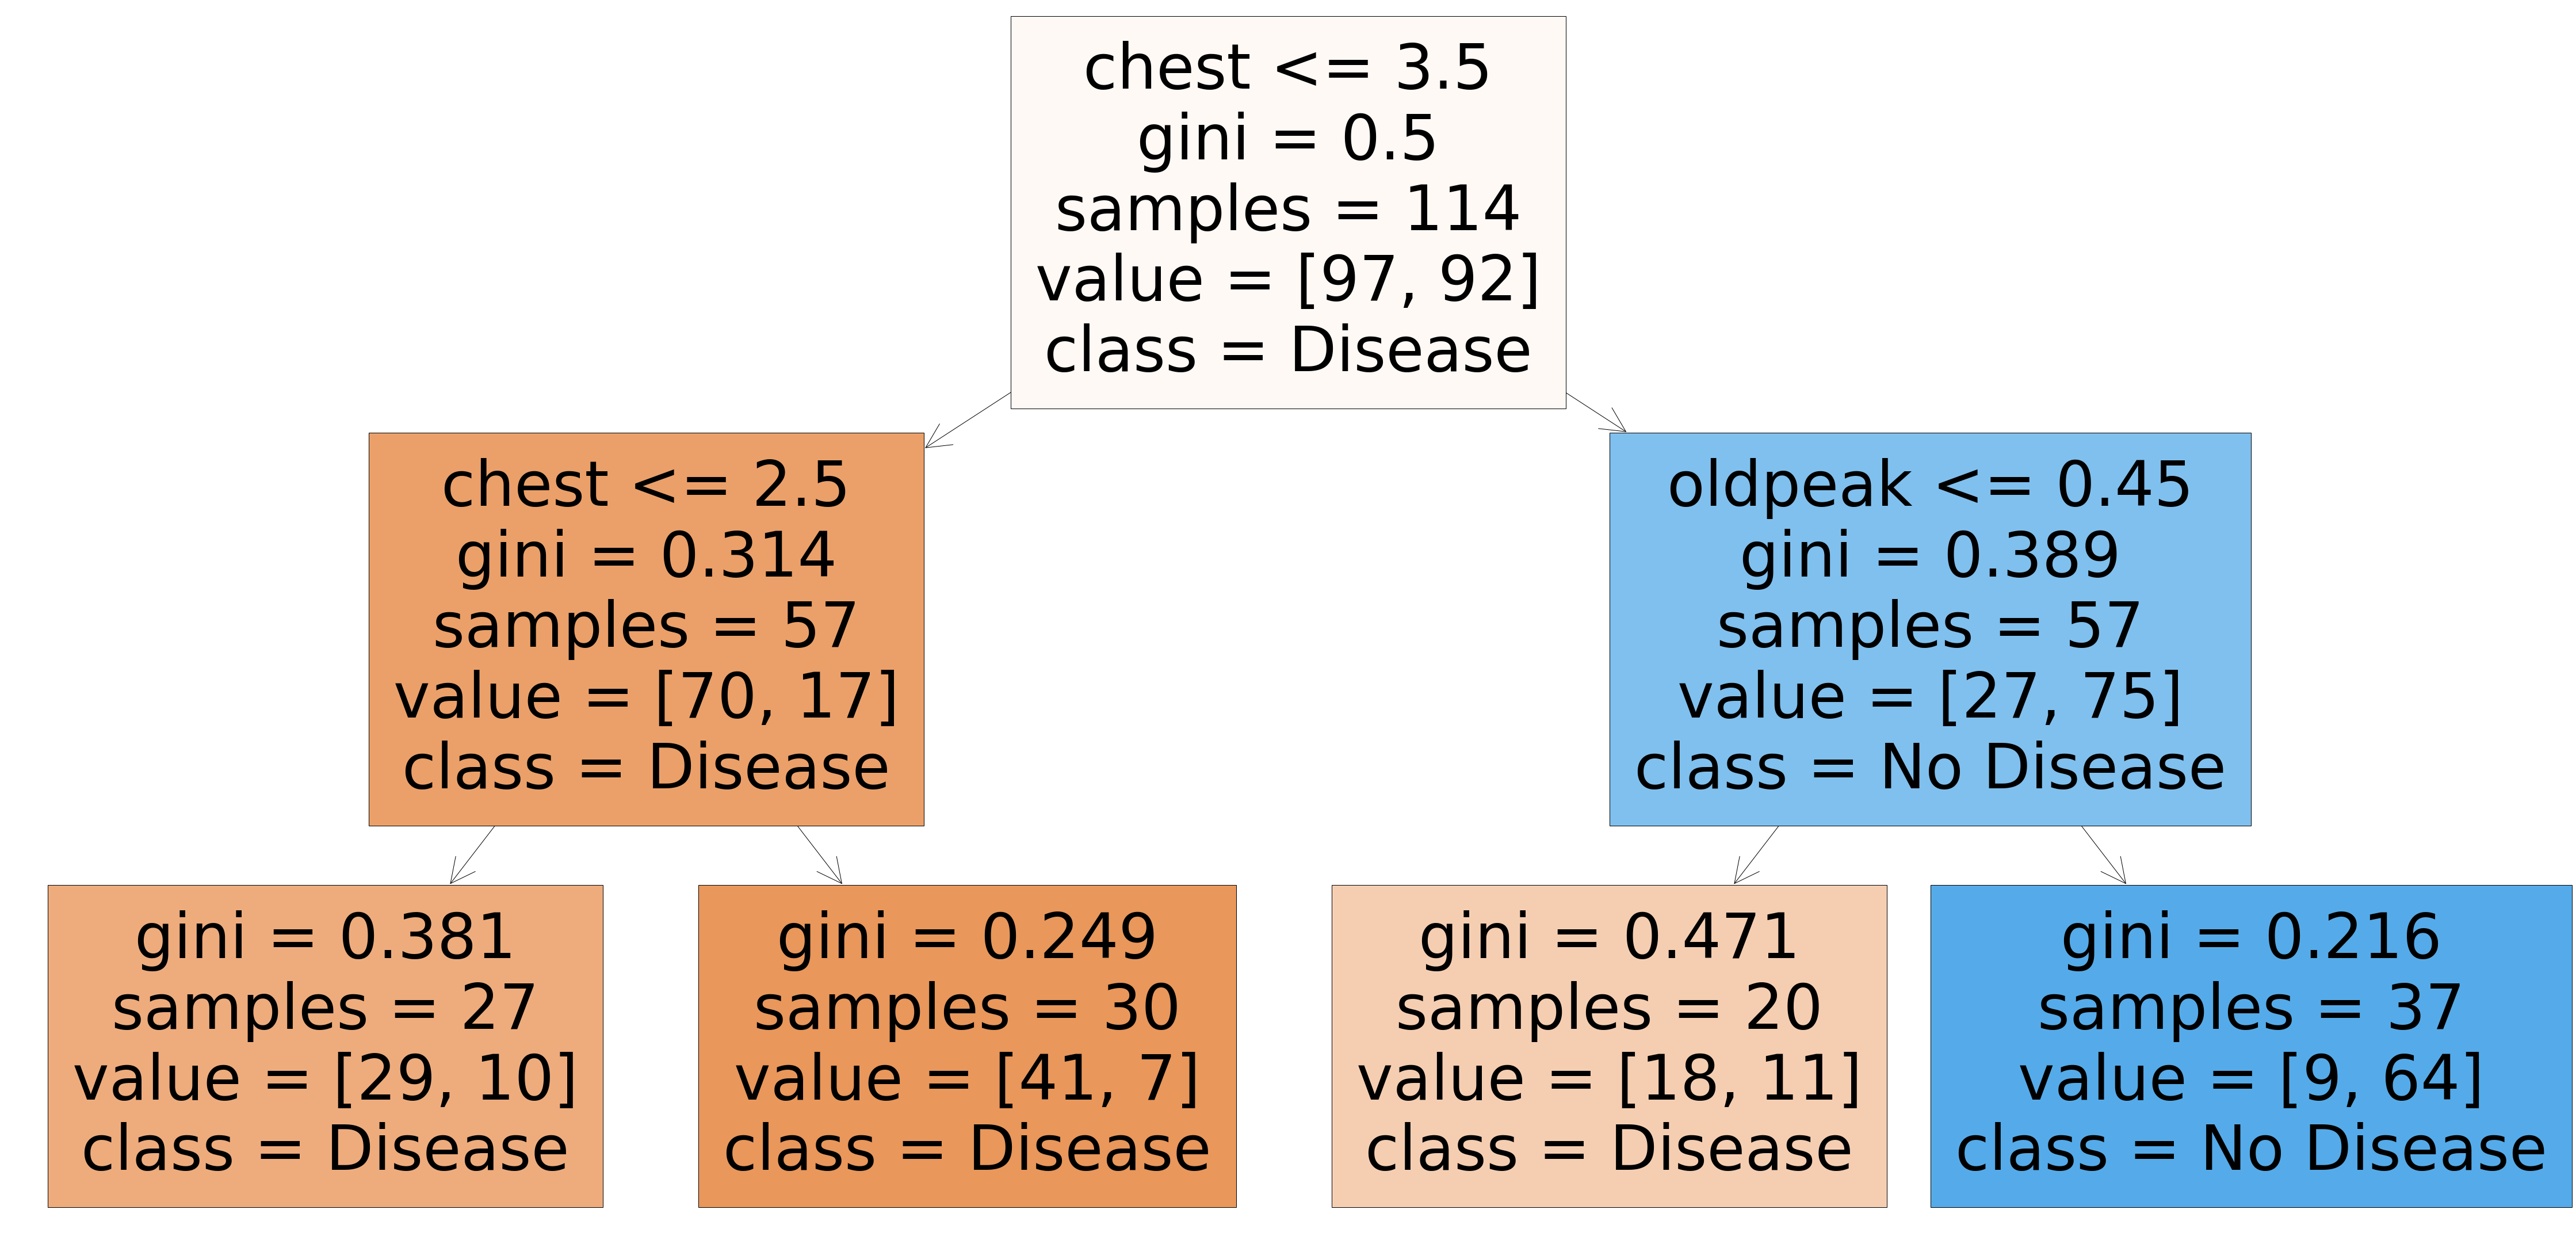

In [145]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [146]:
import seaborn as sns
#use feature importance variable to see the feature importance scores
feature_scores = pd.Series(heart_disease_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

oldpeak                                 0.160264
chest                                   0.121808
thal                                    0.118689
maximum_heart_rate_achieved             0.113724
number_of_major_vessels                 0.099324
slope                                   0.088318
age                                     0.073942
resting_blood_pressure                  0.067102
exercise_induced_angina                 0.063052
serum_cholestoral                       0.057206
sex                                     0.017915
resting_electrocardiographic_results    0.012243
fasting_blood_sugar                     0.006414
dtype: float64

Here we can observe that oldpeak have highest importance and the fasting_bood_sugar is of least importance

**Visualize the feature scores of the features**

Text(0.5, 1.0, 'Visualizing Important Features')

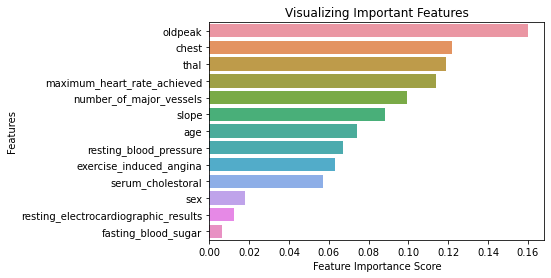

In [147]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

**Build the randon forest model on the selected features**

Lets remove the least important feature fasting_blood_sugar

In [148]:
X = df.drop(["class","fasting_blood_sugar"],axis = 1)
y = df["class"]

In [149]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 12), (81, 12))

In [150]:
from sklearn.metrics import accuracy_score
Ran_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
Ran_Classifier.fit(X_train,y_train)
# Predict on the test set results
y_pred = Ran_Classifier.predict(X_test)
# Check accuracy score 
print('Model accuracy score with Fasting_bllod_sugar variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(Ran_Classifier.oob_score_)

Model accuracy score with Fasting_bllod_sugar variable removed : 0.7901
0.8359788359788359


The accuracy score is getting decreased after removing the least importance feature Fasting_blood_sugar so by this we can say that even though it is least important feature it is geeting impact on the accuracy.

In [151]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        49
           1       0.83      0.59      0.69        32

    accuracy                           0.79        81
   macro avg       0.80      0.76      0.77        81
weighted avg       0.80      0.79      0.78        81

